### For events: 1 - onset, 0 - wakeup, -1 - neither

## Python library installations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import average_precision_score
import pyarrow.parquet as pq

In [2]:
train = pd.read_parquet('/kaggle/input/child-mind-institute-detect-sleep-states/train_series.parquet')

In [3]:
event = pd.read_csv('/kaggle/input/child-mind-institute-detect-sleep-states/train_events.csv')

## Preprocessing

In [4]:
train.info()
train.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127946340 entries, 0 to 127946339
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   series_id  object 
 1   step       uint32 
 2   timestamp  object 
 3   anglez     float32
 4   enmo       float32
dtypes: float32(2), object(2), uint32(1)
memory usage: 3.3+ GB


,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.636700,0.0217
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.636800,0.0215
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.637000,0.0216
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.636800,0.0213
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.636800,0.0215
5,038441c925bb,5,2018-08-14T15:30:25-0400,2.636700,0.0217
6,038441c925bb,6,2018-08-14T15:30:30-0400,2.636700,0.0217
7,038441c925bb,7,2018-08-14T15:30:35-0400,2.636700,0.0218
8,038441c925bb,8,2018-08-14T15:30:40-0400,2.798000,0.0223
9,038441c925bb,9,2018-08-14T15:30:45-0400,3.084700,0.0217


In [5]:
event.info()
event.loc[119:168,:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14508 entries, 0 to 14507
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   series_id  14508 non-null  object 
 1   night      14508 non-null  int64  
 2   event      14508 non-null  object 
 3   step       9585 non-null   float64
 4   timestamp  9585 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 566.8+ KB


,series_id,night,event,step,timestamp
119,03d92c9f6f8a,37,wakeup,NaN,NaN
120,0402a003dae9,1,onset,8364.0,2018-12-19T00:22:00-0500
121,0402a003dae9,1,wakeup,12948.0,2018-12-19T06:44:00-0500
122,0402a003dae9,2,onset,24396.0,2018-12-19T22:38:00-0500
123,0402a003dae9,2,wakeup,29964.0,2018-12-20T06:22:00-0500
124,0402a003dae9,3,onset,NaN,NaN
125,0402a003dae9,3,wakeup,NaN,NaN
126,0402a003dae9,4,onset,NaN,NaN
127,0402a003dae9,4,wakeup,NaN,NaN
128,0402a003dae9,5,onset,NaN,NaN


#### Drop null values in data

In [6]:
train.dropna(inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127946340 entries, 0 to 127946339
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   series_id  object 
 1   step       uint32 
 2   timestamp  object 
 3   anglez     float32
 4   enmo       float32
dtypes: float32(2), object(2), uint32(1)
memory usage: 3.3+ GB


In [7]:
event.dropna(inplace=True)
event.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9585 entries, 0 to 14505
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   series_id  9585 non-null   object 
 1   night      9585 non-null   int64  
 2   event      9585 non-null   object 
 3   step       9585 non-null   float64
 4   timestamp  9585 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 449.3+ KB


#### Enumerate event data

In [8]:
for j in range (0,len(event)):
    if (event['event'].iloc[j] == 'onset'): 
        event['event'].iloc[j] = 1
    if (event['event'].iloc[j] == 'wakeup'): 
        event['event'].iloc[j] = 0
display(event)

/tmp/ipykernel_32/1851474595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event['event'].iloc[j] = 1
/tmp/ipykernel_32/1851474595.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event['event'].iloc[j] = 0
/tmp/ipykernel_32/1851474595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event['event'].iloc[j] = 1
/tmp/ipykernel_32/1851474595.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,series_id,night,event,step,timestamp
0,038441c925bb,1,1,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,0,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,1,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,0,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,1,39996.0,2018-08-16T23:03:00-0400
...,...,...,...,...,...
14501,fe90110788d2,32,0,547152.0,2017-09-05T09:26:00-0400
14502,fe90110788d2,33,1,556560.0,2017-09-05T22:30:00-0400
14503,fe90110788d2,33,0,560604.0,2017-09-06T04:07:00-0400
14504,fe90110788d2,34,1,574620.0,2017-09-06T23:35:00-0400


## Visualization and Preprocessing Continued

In [9]:
train.drop(['step'], axis=1,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127946340 entries, 0 to 127946339
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   series_id  object 
 1   timestamp  object 
 2   anglez     float32
 3   enmo       float32
dtypes: float32(2), object(2)
memory usage: 2.9+ GB


In [10]:
event.drop(['night'], axis=1,inplace=True)
event.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9585 entries, 0 to 14505
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   series_id  9585 non-null   object 
 1   event      9585 non-null   object 
 2   step       9585 non-null   float64
 3   timestamp  9585 non-null   object 
dtypes: float64(1), object(3)
memory usage: 374.4+ KB


### For series id: 0402a003dae9

In [11]:
df1_event = event.drop(event[event['series_id'] != '0402a003dae9'].index, axis=0) 
display(df1_event)
df1_series = train.drop(train[train['series_id'] != '0402a003dae9'].index, axis = 0)
display(df1_series)
df1_series.info()

,series_id,event,step,timestamp
120,0402a003dae9,1,8364.0,2018-12-19T00:22:00-0500
121,0402a003dae9,0,12948.0,2018-12-19T06:44:00-0500
122,0402a003dae9,1,24396.0,2018-12-19T22:38:00-0500
123,0402a003dae9,0,29964.0,2018-12-20T06:22:00-0500
130,0402a003dae9,1,94032.0,2018-12-23T23:21:00-0500
131,0402a003dae9,0,96180.0,2018-12-24T02:20:00-0500
132,0402a003dae9,1,112992.0,2018-12-25T01:41:00-0500
133,0402a003dae9,0,116364.0,2018-12-25T06:22:00-0500
134,0402a003dae9,1,128268.0,2018-12-25T22:54:00-0500
135,0402a003dae9,0,134004.0,2018-12-26T06:52:00-0500


,series_id,timestamp,anglez,enmo
1114020,0402a003dae9,2018-12-18T12:45:00-0500,-77.314903,0.0868
1114021,0402a003dae9,2018-12-18T12:45:05-0500,-52.183800,0.0434
1114022,0402a003dae9,2018-12-18T12:45:10-0500,-53.218601,0.0541
1114023,0402a003dae9,2018-12-18T12:45:15-0500,-51.541698,0.0612
1114024,0402a003dae9,2018-12-18T12:45:20-0500,-24.637300,0.0591
...,...,...,...,...
1511275,0402a003dae9,2019-01-10T12:29:35-0500,15.142100,0.0508
1511276,0402a003dae9,2019-01-10T12:29:40-0500,14.802400,0.0622
1511277,0402a003dae9,2019-01-10T12:29:45-0500,17.306601,0.0243
1511278,0402a003dae9,2019-01-10T12:29:50-0500,14.408900,0.0799


<class 'pandas.core.frame.DataFrame'>
Index: 397260 entries, 1114020 to 1511279
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   series_id  397260 non-null  object 
 1   timestamp  397260 non-null  object 
 2   anglez     397260 non-null  float32
 3   enmo       397260 non-null  float32
dtypes: float32(2), object(2)
memory usage: 12.1+ MB


In [12]:
df1_joined = pd.merge(df1_event, df1_series, on=["timestamp","series_id"], how='right')
display(df1_joined)
df1_joined.info()

,series_id,event,step,timestamp,anglez,enmo
0,0402a003dae9,NaN,NaN,2018-12-18T12:45:00-0500,-77.314903,0.0868
1,0402a003dae9,NaN,NaN,2018-12-18T12:45:05-0500,-52.183800,0.0434
2,0402a003dae9,NaN,NaN,2018-12-18T12:45:10-0500,-53.218601,0.0541
3,0402a003dae9,NaN,NaN,2018-12-18T12:45:15-0500,-51.541698,0.0612
4,0402a003dae9,NaN,NaN,2018-12-18T12:45:20-0500,-24.637300,0.0591
...,...,...,...,...,...,...
397255,0402a003dae9,NaN,NaN,2019-01-10T12:29:35-0500,15.142100,0.0508
397256,0402a003dae9,NaN,NaN,2019-01-10T12:29:40-0500,14.802400,0.0622
397257,0402a003dae9,NaN,NaN,2019-01-10T12:29:45-0500,17.306601,0.0243
397258,0402a003dae9,NaN,NaN,2019-01-10T12:29:50-0500,14.408900,0.0799


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397260 entries, 0 to 397259
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   series_id  397260 non-null  object 
 1   event      36 non-null      object 
 2   step       36 non-null      float64
 3   timestamp  397260 non-null  object 
 4   anglez     397260 non-null  float32
 5   enmo       397260 non-null  float32
dtypes: float32(2), float64(1), object(3)
memory usage: 15.2+ MB


In [13]:
for j in range(0,len(df1_joined)): 
    if(df1_joined['event'].iloc[j] == 1):
        print(df1_joined.loc[j-10:j+10,:])

         series_id event    step                 timestamp     anglez  enmo
8354  0402a003dae9   NaN     NaN  2018-12-19T00:21:10-0500  29.093201   0.0
8355  0402a003dae9   NaN     NaN  2018-12-19T00:21:15-0500  29.082399   0.0
8356  0402a003dae9   NaN     NaN  2018-12-19T00:21:20-0500  29.082399   0.0
8357  0402a003dae9   NaN     NaN  2018-12-19T00:21:25-0500  29.082399   0.0
8358  0402a003dae9   NaN     NaN  2018-12-19T00:21:30-0500  29.028099   0.0
8359  0402a003dae9   NaN     NaN  2018-12-19T00:21:35-0500  29.076401   0.0
8360  0402a003dae9   NaN     NaN  2018-12-19T00:21:40-0500  29.082399   0.0
8361  0402a003dae9   NaN     NaN  2018-12-19T00:21:45-0500  29.082399   0.0
8362  0402a003dae9   NaN     NaN  2018-12-19T00:21:50-0500  29.082399   0.0
8363  0402a003dae9   NaN     NaN  2018-12-19T00:21:55-0500  29.061199   0.0
8364  0402a003dae9     1  8364.0  2018-12-19T00:22:00-0500  29.066299   0.0
8365  0402a003dae9   NaN     NaN  2018-12-19T00:22:05-0500  28.871000   0.0
8366  0402a0

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


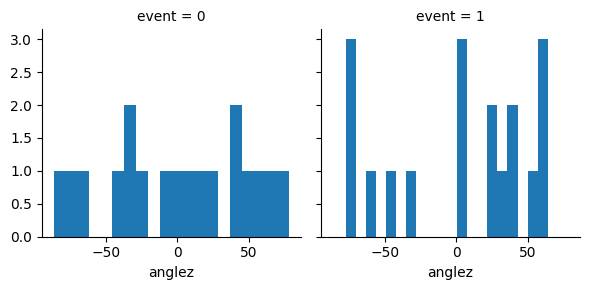

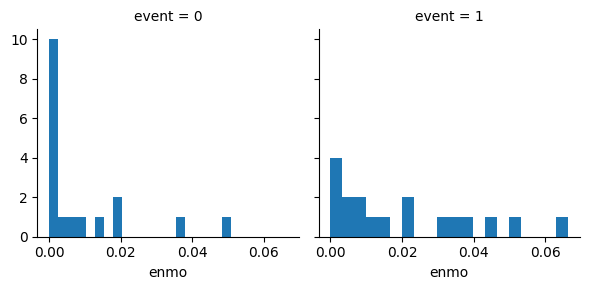

In [14]:
num_interest_cols = ['anglez', 'enmo']
for column in num_interest_cols:
  g = sns.FacetGrid(df1_joined, col='event')
  g.map(plt.hist, column, bins=20)

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df1_joined['timestamp'], df1_joined['step'], alpha=0.5)
plt.title(f"Scatter Plot: step vs. {column}")
plt.xlabel(column)
plt.ylabel('step')
plt.grid(True)
plt.show()

KeyboardInterrupt: 

In [16]:
df1_joined['event'] = df1_joined['event'].fillna(-1)
display(df1_joined)

,series_id,event,step,timestamp,anglez,enmo
0,0402a003dae9,-1,NaN,2018-12-18T12:45:00-0500,-77.314903,0.0868
1,0402a003dae9,-1,NaN,2018-12-18T12:45:05-0500,-52.183800,0.0434
2,0402a003dae9,-1,NaN,2018-12-18T12:45:10-0500,-53.218601,0.0541
3,0402a003dae9,-1,NaN,2018-12-18T12:45:15-0500,-51.541698,0.0612
4,0402a003dae9,-1,NaN,2018-12-18T12:45:20-0500,-24.637300,0.0591
...,...,...,...,...,...,...
397255,0402a003dae9,-1,NaN,2019-01-10T12:29:35-0500,15.142100,0.0508
397256,0402a003dae9,-1,NaN,2019-01-10T12:29:40-0500,14.802400,0.0622
397257,0402a003dae9,-1,NaN,2019-01-10T12:29:45-0500,17.306601,0.0243
397258,0402a003dae9,-1,NaN,2019-01-10T12:29:50-0500,14.408900,0.0799


In [ ]:
plt.figure(figsize=(12,8))

ax1 = plt.subplot2grid((3,1), (0,0), colspan=1)
ax2 = plt.subplot2grid((3,1), (1,0), colspan=1)
ax3 = plt.subplot2grid((3,1), (2,0), colspan=1)

df1_joined.plot(x='timestamp',y='anglez', color = 'b',ax=ax1)
df1_joined.plot(x='timestamp',y='event', color = 'r',ax=ax2)
df1_joined.plot(x='timestamp',y='enmo', color = 'g',ax=ax3)


## Random Series ID's: 

In [18]:
import random
subset_size = 3
sel_id = random.sample(list(train['series_id'].unique()), subset_size)
print(sel_id)

['e34b496b84ce', 'c8053490cec2', '8a306e0890c0']


In [20]:
ftrain = pd.DataFrame(columns=train.columns)
for series_id in sel_id:
    selected_rows = train[train['series_id'] == series_id]
    ftrain = pd.concat([ftrain, selected_rows], ignore_index=True)
print(ftrain)

            series_id                 timestamp     anglez    enmo
0        e34b496b84ce  2017-08-11T13:15:00-0400 -72.467201  0.0040
1        e34b496b84ce  2017-08-11T13:15:05-0400 -72.525597  0.0039
2        e34b496b84ce  2017-08-11T13:15:10-0400 -72.467201  0.0034
3        e34b496b84ce  2017-08-11T13:15:15-0400 -72.467201  0.0039
4        e34b496b84ce  2017-08-11T13:15:20-0400 -72.467201  0.0038
...               ...                       ...        ...     ...
1197355  8a306e0890c0  2017-11-25T05:14:35-0500  -7.728200  0.0072
1197356  8a306e0890c0  2017-11-25T05:14:40-0500  -7.716300  0.0073
1197357  8a306e0890c0  2017-11-25T05:14:45-0500  -7.727200  0.0073
1197358  8a306e0890c0  2017-11-25T05:14:50-0500  -7.721800  0.0073
1197359  8a306e0890c0  2017-11-25T05:14:55-0500  -7.073800  0.0072

[1197360 rows x 4 columns]


In [21]:
fevent = pd.DataFrame(columns=event.columns)
for series_id in sel_id:
    selected_rows2 = event[event['series_id'] == series_id]
    fevent = pd.concat([fevent, selected_rows2], ignore_index=True)
print(fevent)

       series_id event      step                 timestamp
0   e34b496b84ce     1    7464.0  2017-08-11T23:37:00-0400
1   e34b496b84ce     0   13356.0  2017-08-12T07:48:00-0400
2   e34b496b84ce     1   27876.0  2017-08-13T03:58:00-0400
3   e34b496b84ce     0   32076.0  2017-08-13T09:48:00-0400
4   e34b496b84ce     1   76308.0  2017-08-15T23:14:00-0400
..           ...   ...       ...                       ...
89  8a306e0890c0     0  355572.0  2017-11-22T06:36:00-0500
90  8a306e0890c0     1  368112.0  2017-11-23T00:01:00-0500
91  8a306e0890c0     0  373044.0  2017-11-23T06:52:00-0500
92  8a306e0890c0     1  382860.0  2017-11-23T20:30:00-0500
93  8a306e0890c0     0  390324.0  2017-11-24T06:52:00-0500

[94 rows x 4 columns]


In [22]:
dfrand_joined = pd.merge(fevent, ftrain, on=['timestamp','series_id'], how='right')
display(dfrand_joined)
dfrand_joined.info()

,series_id,event,step,timestamp,anglez,enmo
0,e34b496b84ce,NaN,NaN,2017-08-11T13:15:00-0400,-72.467201,0.0040
1,e34b496b84ce,NaN,NaN,2017-08-11T13:15:05-0400,-72.525597,0.0039
2,e34b496b84ce,NaN,NaN,2017-08-11T13:15:10-0400,-72.467201,0.0034
3,e34b496b84ce,NaN,NaN,2017-08-11T13:15:15-0400,-72.467201,0.0039
4,e34b496b84ce,NaN,NaN,2017-08-11T13:15:20-0400,-72.467201,0.0038
...,...,...,...,...,...,...
1197355,8a306e0890c0,NaN,NaN,2017-11-25T05:14:35-0500,-7.728200,0.0072
1197356,8a306e0890c0,NaN,NaN,2017-11-25T05:14:40-0500,-7.716300,0.0073
1197357,8a306e0890c0,NaN,NaN,2017-11-25T05:14:45-0500,-7.727200,0.0073
1197358,8a306e0890c0,NaN,NaN,2017-11-25T05:14:50-0500,-7.721800,0.0073


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197360 entries, 0 to 1197359
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   series_id  1197360 non-null  object 
 1   event      94 non-null       object 
 2   step       94 non-null       float64
 3   timestamp  1197360 non-null  object 
 4   anglez     1197360 non-null  float32
 5   enmo       1197360 non-null  float32
dtypes: float32(2), float64(1), object(3)
memory usage: 45.7+ MB


In [23]:
dfrand_joined['event'] = dfrand_joined['event'].fillna(-1)
display(dfrand_joined)

,series_id,event,step,timestamp,anglez,enmo
0,e34b496b84ce,-1,NaN,2017-08-11T13:15:00-0400,-72.467201,0.0040
1,e34b496b84ce,-1,NaN,2017-08-11T13:15:05-0400,-72.525597,0.0039
2,e34b496b84ce,-1,NaN,2017-08-11T13:15:10-0400,-72.467201,0.0034
3,e34b496b84ce,-1,NaN,2017-08-11T13:15:15-0400,-72.467201,0.0039
4,e34b496b84ce,-1,NaN,2017-08-11T13:15:20-0400,-72.467201,0.0038
...,...,...,...,...,...,...
1197355,8a306e0890c0,-1,NaN,2017-11-25T05:14:35-0500,-7.728200,0.0072
1197356,8a306e0890c0,-1,NaN,2017-11-25T05:14:40-0500,-7.716300,0.0073
1197357,8a306e0890c0,-1,NaN,2017-11-25T05:14:45-0500,-7.727200,0.0073
1197358,8a306e0890c0,-1,NaN,2017-11-25T05:14:50-0500,-7.721800,0.0073


In [ ]:
plot1 = dfrand_joined[dfrand_joined['series_id'] == sel_id[0]]
plot2 = dfrand_joined[dfrand_joined['series_id'] == sel_id[1]]
plot3 = dfrand_joined[dfrand_joined['series_id'] == sel_id[2]]

In [ ]:
plt.figure(figsize=(12,8))

ax1 = plt.subplot2grid((3,1), (0,0), colspan=1)
ax2 = plt.subplot2grid((3,1), (1,0), colspan=1)
ax3 = plt.subplot2grid((3,1), (2,0), colspan=1)

plt.suptitle("series id: " + sel_id[0])

plot1.plot(x='timestamp',y='anglez', color = 'b',ax=ax1)
plot1.plot(x='timestamp',y='event', color = 'r',ax=ax2)
plot1.plot(x='timestamp',y='enmo', color = 'g',ax=ax3)

In [ ]:
plt.figure(figsize=(12,8))

ax1 = plt.subplot2grid((3,1), (0,0), colspan=1)
ax2 = plt.subplot2grid((3,1), (1,0), colspan=1)
ax3 = plt.subplot2grid((3,1), (2,0), colspan=1)

plt.suptitle("series id: " + sel_id[1])

plot2.plot(x='timestamp',y='anglez', color = 'b',ax=ax1)
plot2.plot(x='timestamp',y='event', color = 'r',ax=ax2)
plot2.plot(x='timestamp',y='enmo', color = 'g',ax=ax3)

In [ ]:
plt.figure(figsize=(12,8))

ax1 = plt.subplot2grid((3,1), (0,0), colspan=1)
ax2 = plt.subplot2grid((3,1), (1,0), colspan=1)
ax3 = plt.subplot2grid((3,1), (2,0), colspan=1)

plt.suptitle("series id: " + sel_id[2])

plot3.plot(x='timestamp',y='anglez', color = 'b',ax=ax1)
plot3.plot(x='timestamp',y='event', color = 'r',ax=ax2)
plot3.plot(x='timestamp',y='enmo', color = 'g',ax=ax3)

#### Thus far, we have joined the train_series parquet file and the train_events csv file for a subset of rnadom series IDs based on the timestamps available. This allowed us to visualize the data and confirm our hypothesis that enmo and anglez are the two features that are most correlated to wakeup and onset events. For preprocessing, we removed null values from the events data, dropped the step feature from both the datasets, and the nights feature from the events data, enumerated the events column of the events dataset, joined the datasets such that the events data correlates to the series data based on timestamps, and gives labels for the desired portions such that 1 indicates wakeup, 0 indicates onset, and -1 indicates neither onset nor wakeup. Finally, for visualization, we plotted each of the random series ID's data (anglez, timstamp, and event) against timestamp to see the correlation between the three. For training, we will again drop the undesired columns, merge the data like we've done, enumerate the events, and train it on the merged data without the events category as features and the events category as labels. 

## More Processing

In [24]:
def MA_mean(data,steps):
    mean=data.rolling(steps).mean()
    mean.dropna(inplace=True)
    return mean

def MA_std(data,steps):
    std=data.rolling(steps).std()
    std.dropna(inplace=True)
    return std

def MA_median(data,steps): 
    median=data.rolling(steps).median()
    median.dropna(inplace=True)
    return median

In [25]:
import random
subset_size = 3
sel_id = random.sample(list(train['series_id'].unique()), subset_size)
print(sel_id)

['e8d0a37c3eba', '51fdcc8d9fe7', '33ceeba8918a']


In [26]:
ftrain = pd.DataFrame(columns=train.columns)
for series_id in sel_id:
    selected_rows = train[train['series_id'] == series_id]
    ftrain = pd.concat([ftrain, selected_rows], ignore_index=True)
fevent = pd.DataFrame(columns=event.columns)
for series_id in sel_id:
    selected_rows2 = event[event['series_id'] == series_id]
    fevent = pd.concat([fevent, selected_rows2], ignore_index=True)
    
dfrand_joined = pd.merge(fevent, ftrain, on=['timestamp','series_id'], how='right')

In [27]:
dfrand_joined['event'] = dfrand_joined['event'].fillna(-1)
dfrand_joined.head()

,series_id,event,step,timestamp,anglez,enmo
0,e8d0a37c3eba,-1,NaN,2018-08-29T12:30:00-0400,-55.510601,0.1157
1,e8d0a37c3eba,-1,NaN,2018-08-29T12:30:05-0400,-37.631100,0.0828
2,e8d0a37c3eba,-1,NaN,2018-08-29T12:30:10-0400,-22.735201,0.0739
3,e8d0a37c3eba,-1,NaN,2018-08-29T12:30:15-0400,-8.439700,0.0686
4,e8d0a37c3eba,-1,NaN,2018-08-29T12:30:20-0400,0.664200,0.0410


In [29]:
moving_average = 300
    
df2 = dfrand_joined[dfrand_joined['series_id'] == sel_id[1]].copy()

df2_anglez = df2['anglez'].copy()
df2['anglez_med']  = MA_median(df2['anglez'],moving_average)
df2['anglez_ma']  = MA_mean(df2['anglez'],moving_average)


df2_enmo = df2['enmo'].copy()
df2['enmo_ma']  = MA_mean(df2_enmo,moving_average)

In [ ]:
plt.figure(figsize=(12,8))

ax1 = plt.subplot2grid((4,1), (0,0), colspan=1)
ax2 = plt.subplot2grid((4,1), (1,0), colspan=1)
ax3 = plt.subplot2grid((4,1), (2,0), colspan=1)
ax4 = plt.subplot2grid((4,1), (3,0), colspan=1)

plt.suptitle("series id: " + sel_id[1])

df2.plot(x='timestamp',y='anglez_med', color = 'b',ax=ax1)
df2.plot(x='timestamp',y='anglez_ma', color = 'g',ax=ax2)
df2.plot(x='timestamp',y='enmo_ma', color = 'c',ax=ax3)
df2.plot(x='timestamp',y='event', color = 'r',ax=ax4)

## Training
### Perform training on a subset of random series ID's and their enmo moving averages and anglez moving average

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

In [31]:
fevent = event
ftrain = train
ftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127946340 entries, 0 to 127946339
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   series_id  object 
 1   timestamp  object 
 2   anglez     float32
 3   enmo       float32
dtypes: float32(2), object(2)
memory usage: 2.9+ GB


In [32]:
df3 = pd.merge(fevent, ftrain, on=['timestamp','series_id'], how='right')

In [33]:
display(df3)

,series_id,event,step,timestamp,anglez,enmo
0,038441c925bb,NaN,NaN,2018-08-14T15:30:00-0400,2.636700,0.0217
1,038441c925bb,NaN,NaN,2018-08-14T15:30:05-0400,2.636800,0.0215
2,038441c925bb,NaN,NaN,2018-08-14T15:30:10-0400,2.637000,0.0216
3,038441c925bb,NaN,NaN,2018-08-14T15:30:15-0400,2.636800,0.0213
4,038441c925bb,NaN,NaN,2018-08-14T15:30:20-0400,2.636800,0.0215
...,...,...,...,...,...,...
127946335,fe90110788d2,NaN,NaN,2017-09-08T00:14:35-0400,-27.277500,0.0204
127946336,fe90110788d2,NaN,NaN,2017-09-08T00:14:40-0400,-27.032499,0.0233
127946337,fe90110788d2,NaN,NaN,2017-09-08T00:14:45-0400,-26.841200,0.0202
127946338,fe90110788d2,NaN,NaN,2017-09-08T00:14:50-0400,-26.723900,0.0199


In [35]:
#df3.drop('step_x',axis = 1, inplace=True)
#display(df3)

In [36]:
moving_average = 30

df3['anglez_ma']  = MA_mean(df3['anglez'],moving_average)

df3['enmo_ma']  = MA_mean(df3['enmo'],moving_average)

In [37]:
df3.dropna(subset=['event'], inplace=True)
display(df3)

,series_id,event,step,timestamp,anglez,enmo,anglez_ma,enmo_ma
4992,038441c925bb,1,4992.0,2018-08-14T22:26:00-0400,-78.690598,0.0099,-55.329500,0.012893
10932,038441c925bb,0,10932.0,2018-08-15T06:41:00-0400,-61.578201,0.0263,-62.889424,0.021160
20244,038441c925bb,1,20244.0,2018-08-15T19:37:00-0400,-6.387400,0.0182,-16.632030,0.110337
27492,038441c925bb,0,27492.0,2018-08-16T05:41:00-0400,-45.355099,0.0165,-49.321960,0.016370
39996,038441c925bb,1,39996.0,2018-08-16T23:03:00-0400,-1.786700,0.0000,-13.420330,0.005817
...,...,...,...,...,...,...,...,...
127901112,fe90110788d2,0,547152.0,2017-09-05T09:26:00-0400,-56.768902,0.0042,-57.011180,0.003247
127910520,fe90110788d2,1,556560.0,2017-09-05T22:30:00-0400,-16.586700,0.0000,19.465203,0.066800
127914564,fe90110788d2,0,560604.0,2017-09-06T04:07:00-0400,-43.050900,0.0000,-43.150110,0.000023
127928580,fe90110788d2,1,574620.0,2017-09-06T23:35:00-0400,1.519100,0.0066,-15.414343,0.018470


In [38]:
df3['rows'] = range(len(df3))
df3['idrows'] = range(len(df3))
display(df3)

,series_id,event,step,timestamp,anglez,enmo,anglez_ma,enmo_ma,rows,idrows
4992,038441c925bb,1,4992.0,2018-08-14T22:26:00-0400,-78.690598,0.0099,-55.329500,0.012893,0,0
10932,038441c925bb,0,10932.0,2018-08-15T06:41:00-0400,-61.578201,0.0263,-62.889424,0.021160,1,1
20244,038441c925bb,1,20244.0,2018-08-15T19:37:00-0400,-6.387400,0.0182,-16.632030,0.110337,2,2
27492,038441c925bb,0,27492.0,2018-08-16T05:41:00-0400,-45.355099,0.0165,-49.321960,0.016370,3,3
39996,038441c925bb,1,39996.0,2018-08-16T23:03:00-0400,-1.786700,0.0000,-13.420330,0.005817,4,4
...,...,...,...,...,...,...,...,...,...,...
127901112,fe90110788d2,0,547152.0,2017-09-05T09:26:00-0400,-56.768902,0.0042,-57.011180,0.003247,9580,9580
127910520,fe90110788d2,1,556560.0,2017-09-05T22:30:00-0400,-16.586700,0.0000,19.465203,0.066800,9581,9581
127914564,fe90110788d2,0,560604.0,2017-09-06T04:07:00-0400,-43.050900,0.0000,-43.150110,0.000023,9582,9582
127928580,fe90110788d2,1,574620.0,2017-09-06T23:35:00-0400,1.519100,0.0066,-15.414343,0.018470,9583,9583


In [39]:
# Split the data into training and test sets
X = df3[['anglez_ma', 'enmo_ma']]
y = df3[['event']].astype('int')
X_train, X_test, y_train, y_test, row_train, row_test, id_train, id_test = train_test_split(X, y, df3['rows'], df3['idrows'], test_size=0.3, random_state=42)

In [40]:
row_test

65949024    5143
53372376    4229
403404        39
94031916    7169
24102132    1840
            ... 
49286736    3934
94520328    7205
63829512    4963
41760456    3251
28509024    2173
Name: rows, Length: 2876, dtype: int64

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, random_state=42, oob_score=True)

In [45]:
# Train the data
clf.fit(X_train, y_train)

/tmp/ipykernel_32/4205918795.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=42)

## Prediction

In [46]:
# Predicting the target for test data
pred = clf.predict(X_test)

In [47]:
prob = clf.predict_proba(X_test)[:, 1]

### Post-processing - Accuracy Analysis and Visualization¶

In [48]:
from sklearn.metrics import average_precision_score
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import recall_score, precision_score, r2_score, confusion_matrix

In [49]:
# Evaluating the classifier
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6905424200278164


In [50]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[ 944  478]
 [ 412 1042]]


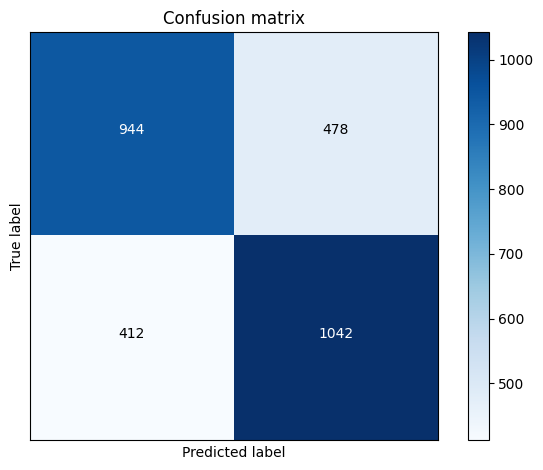

In [51]:
cnf_matrix = confusion_matrix(y_test,pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[], normalize=False,title='Confusion matrix')


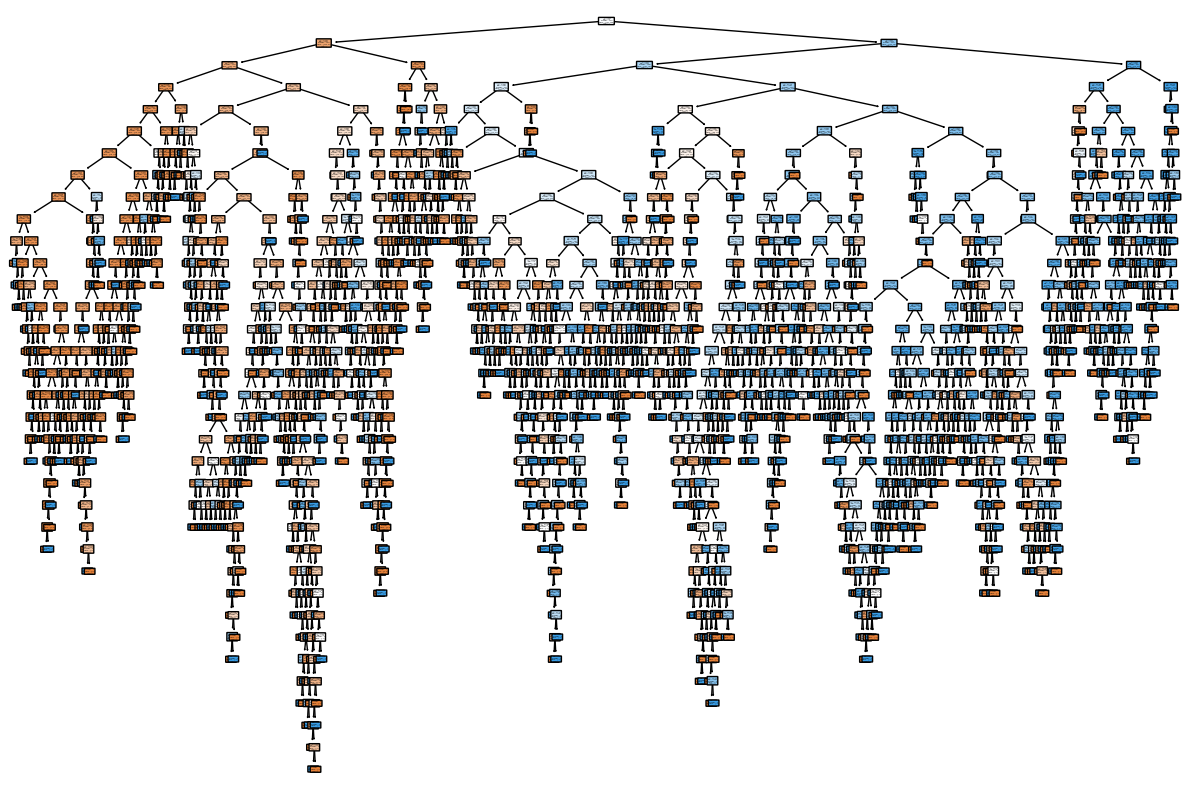

In [52]:
sleep_feature_names = list(X)
sleep_class_names = list(df3['event'])


fig = plt.figure(figsize=(15, 10))
plot_tree(clf.estimators_[0], 
          feature_names = str(sleep_feature_names),
          class_names = str(sleep_class_names),
          filled=True, impurity=True, 
          rounded=True);

In [53]:
#test_error_score = r2_score(y_test, y_pred) 
#print("R squared Error - Test: ", test_error_score) 

precision = precision_score(y_test, pred, average="weighted")
recall = recall_score(y_test, pred, average="weighted")

print ("Precision:", precision)
print ("Recall:", recall)
print ("Out of Bag Score:", clf.oob_score_)

Precision: 0.6907865666942844
Recall: 0.6905424200278164
Out of Bag Score: 0.6983156953346251


### Submission CSV using Test File


In [95]:
test = pd.read_parquet('/kaggle/input/child-mind-institute-detect-sleep-states/test_series.parquet')

In [96]:
moving_average = 30

test['anglez_ma']  = MA_mean(test['anglez'],moving_average)

test['enmo_ma']  = MA_mean(test['enmo'],moving_average)

In [97]:
newtest = test.dropna()

In [98]:
Ypred = clf.predict(newtest[['anglez_ma','enmo_ma']])

In [99]:
def get_moving_average(y_pred):
    window_size = 5
    vals = pd.Series(y_pred)
    window = vals.rolling(window_size).mean()
    window = window.apply(lambda x: 1 if x > 0.5 else 0)
    return window

In [100]:
y_pred_smooth = get_moving_average(Ypred)

In [101]:
#timestamps_test = df3.iloc[row_test][['timestamp']]
#id_test=df3.iloc[row_test][['series_id']]
#display(timestamps_test)

In [102]:
timediff = []
steps = pd.DataFrame({'step': [0]})

#dater = [str(timestamp) for timestamp in timestamps_test]
time = pd.to_datetime(newtest['timestamp'], format='%Y-%m-%dT%H:%M:%S%z')
display(time.iloc[0])

Timestamp('2018-08-14 15:32:25-0400', tz='UTC-04:00')

In [103]:
diffsec = []
steps = []
for i in range(len(time)):
    diffsec = abs((time.iloc[0] - time.iloc[i]).total_seconds())
    steps.append(diffsec / 5) 

In [104]:
# Calculation of confidence scores for CSV file
scores = clf.predict_proba(newtest[['anglez_ma','enmo_ma']])[:, 1]

In [105]:
# Converting back to onset and wakeup
for j in range (0,len(y_pred_smooth)):
    if (y_pred_smooth.iloc[j] == 1): 
        y_pred_smooth.iloc[j] = 'onset'
    if (y_pred_smooth.iloc[j] == 0): 
        y_pred_smooth.iloc[j] = 'wakeup'

In [106]:
rounded_steps = [round(step) for step in steps]
rounded_steps = list(map(int, rounded_steps))

In [107]:
len(scores)

421

In [112]:
submission = pd.DataFrame({
    'series_id': newtest['series_id'].values.tolist(),
    'step': rounded_steps,
    'event': y_pred_smooth,
    'score': scores
})
submission.insert(0, 'row_id', range(len(newtest['series_id'])))
submission.to_csv('submission.csv', index=False)